In [3]:
import japanize_matplotlib
def extract_num(data):
    ans = 0
    is_decimal = False
    divide = 0.1
    for d in data:
        if is_decimal:
            divide *= 10
        if '0'<=d and d<='9':
            ans = ans*10+int(d)
        elif d=='.':
            is_decimal=True
        else:
            return ans/divide

In [33]:
def calc_think_time_mean(time_ar):
    think_time = 0
    epoch = 0
    for i in range(len(time_ar)):
        if i%2==1:
            epoch+=1
            think_time += time_ar[i+1]-time_ar[i]
    return think_time/epoch
def calc_ttl_time(time_ar):
    return time_ar[len(time_ar)-1]-time_ar[0]

In [5]:
def read_file_and_return_mean_time(file_name):
    f = open(file_name, 'r')
    iec_time = []
    datalist = f.readlines()
    for data in datalist:
        iec_time.append(extract_num(data))
    f.close()
    return calc_think_time_mean(iec_time)

In [35]:
def read_file_and_return_ttl_time(file_name):
    f = open(file_name, 'r')
    iec_time = []
    datalist = f.readlines()
    for data in datalist:
        iec_time.append(extract_num(data))
    f.close()
    return calc_ttl_time(iec_time)
def read_file_and_return_epoch(file_name):
    f = open(file_name, 'r')
    iec_time = []
    datalist = f.readlines()
    return int(len(datalist)/2)

In [24]:
print(read_file_and_return_time('iec/19.txt'))
print(read_file_and_return_time('conv/19.txt'))

37.4161461353302
87.80271142721176


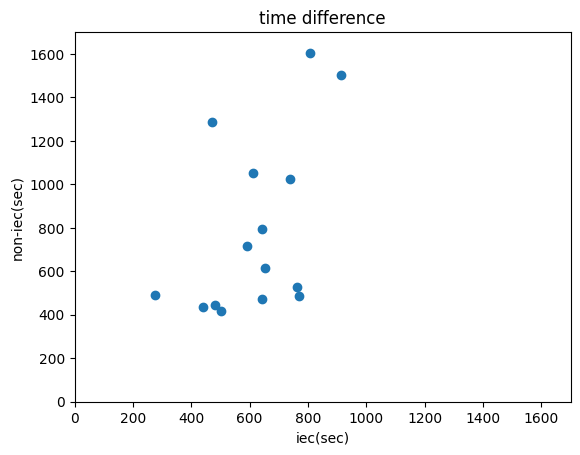

In [44]:

#かかった時間のプロット
import numpy as np
import matplotlib.pyplot as plt
import glob

iec_files = glob.glob("./iec/*")
conv_files = glob.glob("./conv/*")
iec_x = []
# iec_y = []
# conv_x = []
conv_y = []
for file in iec_files:
    iec_x.append(read_file_and_return_ttl_time(file))
#     iec_x.append(read_file_and_return_epoch(file))
for file in conv_files:
    conv_y.append(read_file_and_return_ttl_time(file))
#     conv_x.append(read_file_and_return_epoch(file))
# x = [1,2,3]
# y = [2,3,4]
plt.scatter(iec_x, conv_y)
plt.xlim(0,1700)
plt.ylim(0,1700)
plt.xlabel("iec(sec)")
plt.ylabel("non-iec(sec)")
plt.title("time difference")
# plt.scatter(conv_x, conv_y)
plt.show()

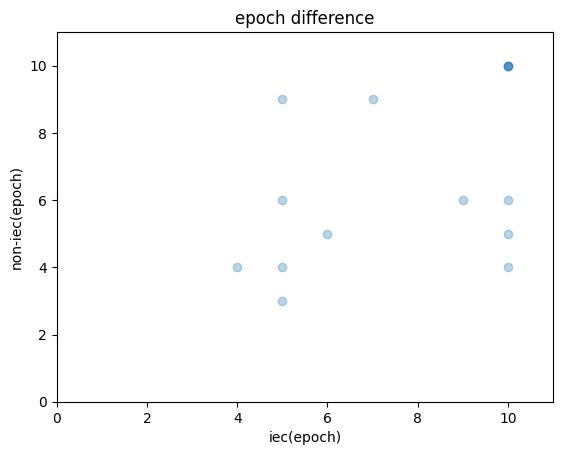

In [50]:
#世代数のプロット
iec_files = glob.glob("./iec/*")
conv_files = glob.glob("./conv/*")
iec_x = []
conv_y = []
for file in iec_files:
    iec_x.append(read_file_and_return_epoch(file))
for file in conv_files:
    conv_y.append(read_file_and_return_epoch(file))
plt.scatter(iec_x, conv_y, alpha=0.3)
plt.xlim(0,11)
plt.ylim(0,11)
plt.xlabel("iec(epoch)")
plt.ylabel("non-iec(epoch)")
plt.title("epoch difference")
# plt.scatter(conv_x, conv_y)
plt.show()

Text(0.5, 1.0, 'title')

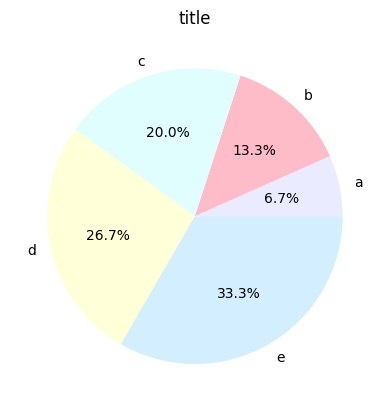

In [57]:
#円グラフ
colors = ["#EAEBFF", "#FEBCC8", "#E0FEFE", "#FFFFD8", "#D3EEFF"]
label = ["a", "b", "c", "d", "e"]
x = np.array([100, 200, 300, 400, 500])
plt.pie(x,labels=label,colors=colors,autopct="%1.1f%%")
plt.title("title")

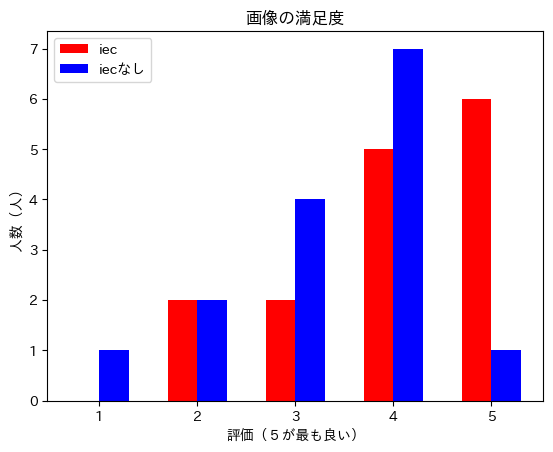

In [76]:
#
height1 = [0, 2, 2, 5, 6]  # 点数1
height2 = [1,2,4,7,1]  # 点数2
 
left = np.arange(len(height1))  # numpyで横軸を設定
labels = ['1', '2', '3', '4', '5']
 
width = 0.3
 
plt.bar(left, height1, color='r', width=width, align='center',label='iec')
plt.bar(left+width, height2, color='b', width=width, align='center',label='iecなし')
plt.xlabel("評価（５が最も良い）")
plt.ylabel("人数（人）")
plt.title("画像の満足度")
plt.xticks(left + width/2, labels)
plt.legend(loc="upper left")
plt.savefig("sample.png")
plt.show()